# Exercise 5: Peceptual Bistability

In [55]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

## 1. Binocular Rivalry

In [56]:
def heaviside_step(x):
    if x >= 0:
        return 1.0
    else:
        return 0.0

# def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
def laing_chow(x, t, I1, I2):
    alpha = 0.2
    beta = 0.4
    phi = 0.4
    tau = 20.0
    g1 = 1.0
    g2 = 1.0
    u1 = x[0]
    a1 = x[1]
    u2 = x[2]
    a2 = x[3]

    du1_dt = - u1 + heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2_dt = - u2 + heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1_dt = (-a1 + phi * heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))/tau
    da2_dt = (-a2 + phi * heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))/tau

    return [du1_dt, da1_dt, du2_dt, da2_dt]

In [60]:
# u1 = 1, a1 = 0.1, u2 = 0, a2 = 0.25
x0 = [1.0, 0.1, 0.0, 0.25]
t = np.linspace(0, 500, 5001)
I1 = 0.43
I2 = 0.5
a = odeint(laing_chow, x0, t, args=(I1, I2))

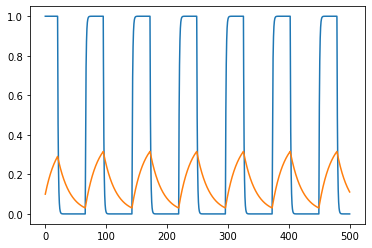

In [61]:
plt.plot(t, a[:, 0])
plt.plot(t, a[:, 1])

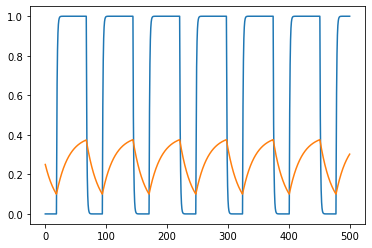

In [62]:
plt.plot(t, a[:, 2])
plt.plot(t, a[:, 3])